In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Projects/Nuclear Physics GPT/Data/nuclear_physics_clean_df.csv', index_col=0).reset_index(drop=True)

df

,Protons,Neutrons,Atomic Weight,Mass Excess,Binding Energy,Decay Mode,Half-life,Half-life Magnitude,Half-life Time
0,1,0,1.007825,7.288970,0.000000,Stable,2.486929e+62,62.0,8.000000e+00
1,1,1,2.014102,13.135722,1.112283,Stable,2.486929e+62,62.0,8.000000e+00
2,1,2,3.016049,14.949806,2.827266,β-,3.885728e+08,8.0,7.019868e+00
3,1,3,4.027806,25.901518,1.400351,n,9.917391e-23,-23.0,9.917391e-17
4,1,4,5.035311,32.892440,1.336360,2n,8.003509e-23,-23.0,8.003509e-17
...,...,...,...,...,...,...,...,...,...
3178,117,174,291.206564,192.413000,7.096000,α,9.954596e-03,-3.0,2.332675e+00
3179,117,175,292.207549,193.330000,7.096000,α,5.000000e-02,-2.0,2.566323e+00
3180,117,176,NaN,NaN,NaN,Stable,NaN,NaN,NaN
3181,117,177,NaN,NaN,NaN,Stable,NaN,NaN,NaN


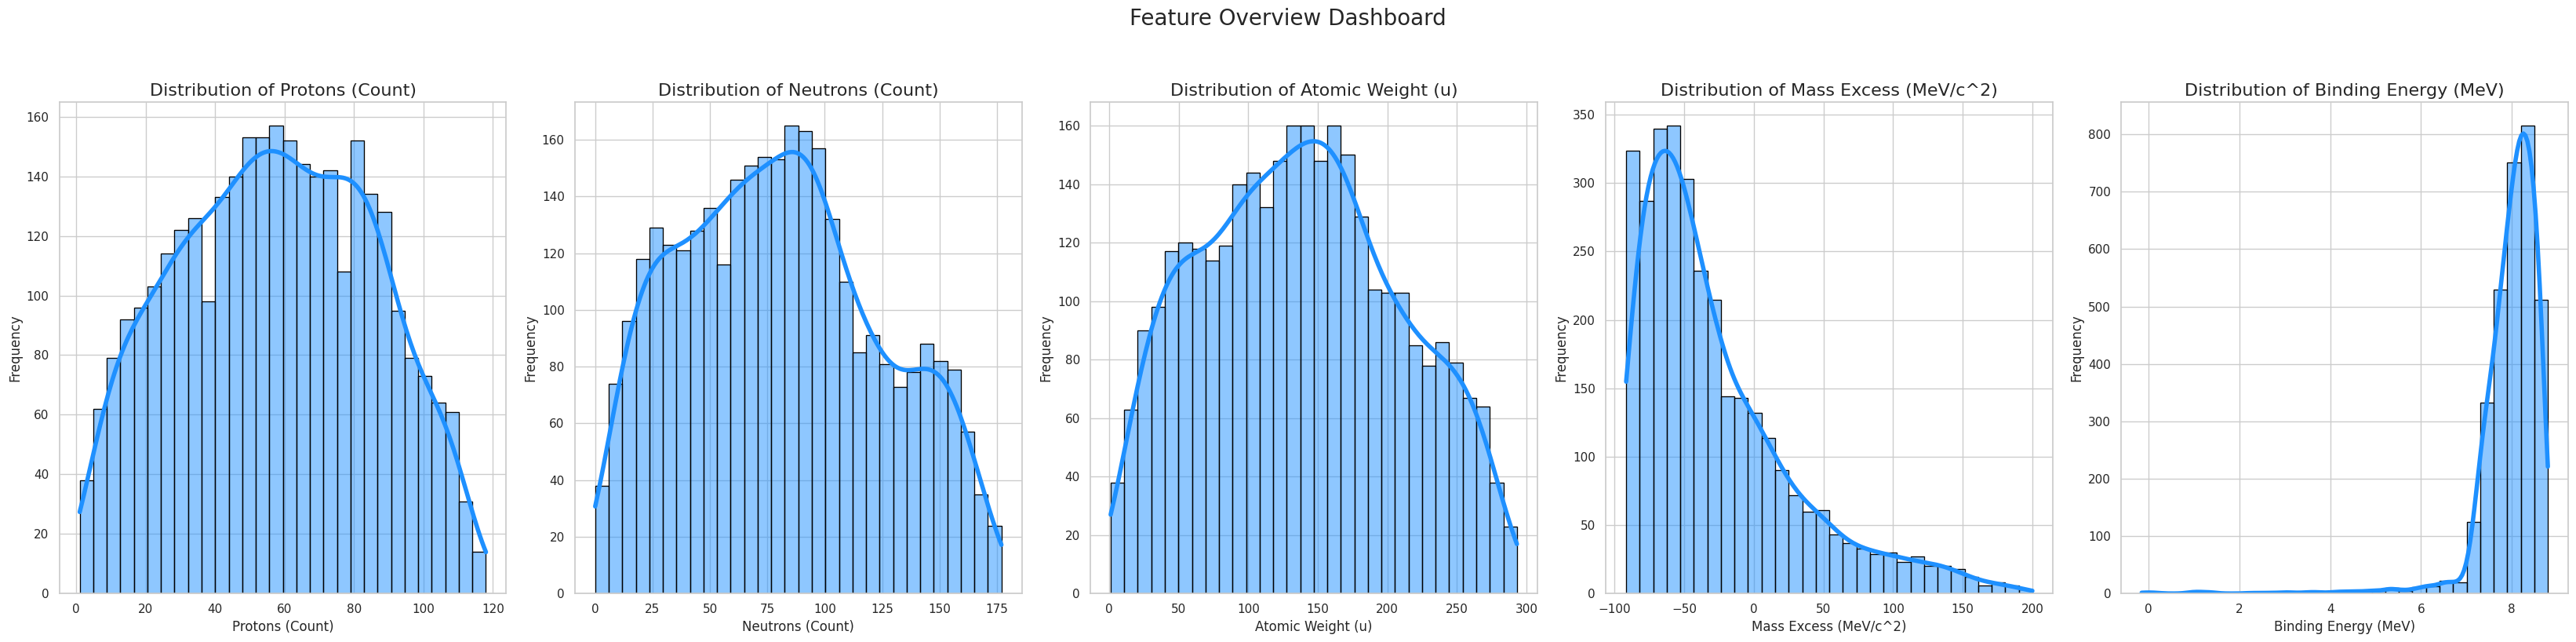

In [236]:
# Customize the aesthetic style for a more modern look
sns.set(style="whitegrid", palette="coolwarm_r")

# Initialize the figure with a larger size and a main title
plt.figure(figsize=(33, 8))
plt.suptitle('Feature Overview Dashboard', fontsize=20, y=1.02)

# List of numerical features to plot along with their units
numerical_features_with_units = [
    ('Protons', 'Count'),
    ('Neutrons', 'Count'),
    ('Atomic Weight', 'u'),  # atomic mass unit
    ('Mass Excess', 'MeV/c^2'),  # Mega electronvolts per speed of light squared
    ('Binding Energy', 'MeV')  # Mega electronvolts
]

# Create subplots for each numerical feature
for i, (feature, unit) in enumerate(numerical_features_with_units, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df[feature], bins=30, kde=True, color='dodgerblue', edgecolor='black',  line_kws={'lw': 4})
    plt.title(f'Distribution of {feature} ({unit})', fontsize=16)
    plt.xlabel(f"{feature} ({unit})")
    plt.ylabel("Frequency")

# Enhance the layout
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()


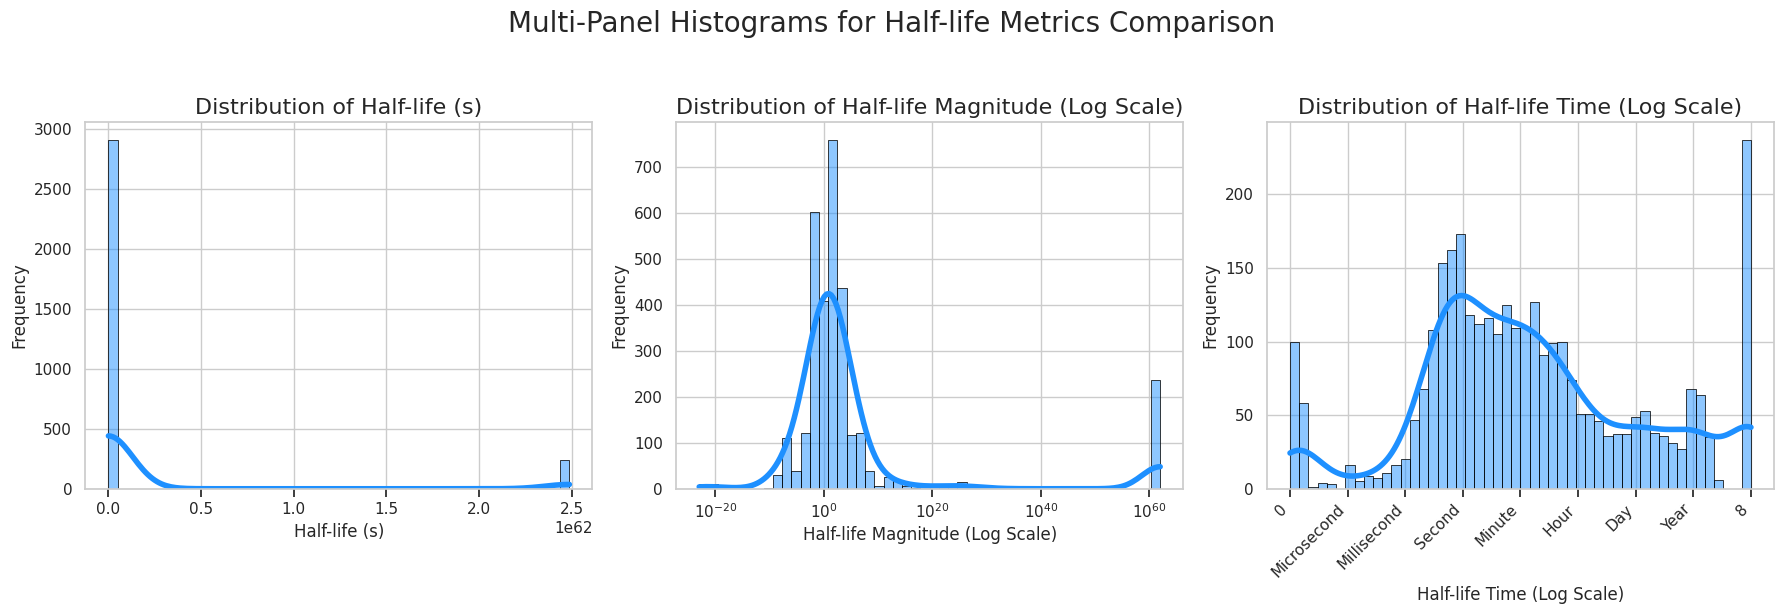

In [141]:
# Initialize the figure with a larger size and a main title
plt.figure(figsize=(18, 6))
plt.suptitle('Multi-Panel Histograms for Half-life Metrics Comparison', fontsize=20, y=1.02)

# List of half-life metrics to plot along with their units
half_life_metrics_with_units = [
    ('Half-life', 's'),  # seconds
    ('Half-life Magnitude', 'Log Scale'),  # log scale
    ('Half-life Time', 'Log Scale'),  # categorical
]

# Create subplots for each half-life metric
for i, (feature, unit) in enumerate(half_life_metrics_with_units, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=50, kde=True, color='dodgerblue', edgecolor='black', line_kws={'lw': 4})
    plt.title(f'Distribution of {feature} ({unit})', fontsize=16)
    plt.xlabel(f"{feature} ({unit})")
    plt.ylabel("Frequency")
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)  # Ensure that ticks are visible

    # Special handling for 'Half-life Time' to set custom x-axis labels
    if feature == 'Half-life Time':
        plt.xticks(range(0, 9), ['0', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Year', '8'], rotation=45, ha='right')

    if feature == 'Half-life Magnitude':
        ticks = plt.xticks()[0][1:-1]
        plt.xticks(ticks, [f'$10^{{{int(tick)}}}$' for tick in ticks])

# Enhance the layout
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


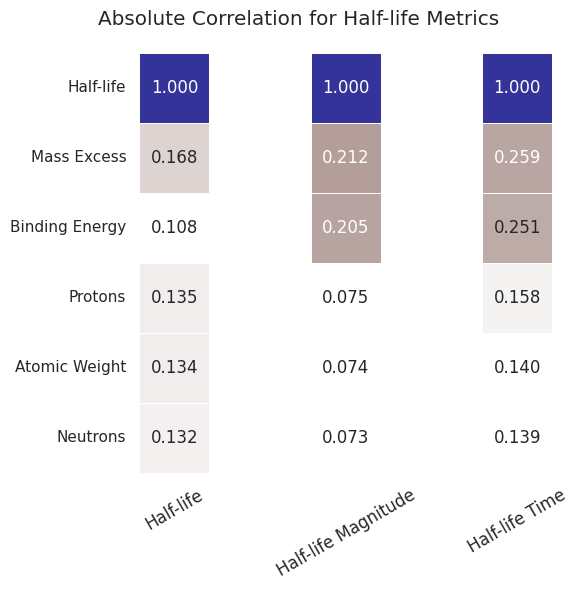

In [252]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Log-transform features for better visualization and correlation understanding
log_features = ['Protons (Log)', 'Neutrons (Log)', 'Atomic Weight (Log)', 'Binding Energy (Log)', 'Mass Excess (Log)']
df['Protons (Log)'] = np.log10(df['Protons'])
df['Neutrons (Log)'] = np.log10(df['Neutrons'])
df['Atomic Weight (Log)'] = np.log10(df['Atomic Weight'])
df['Binding Energy (Log)'] = np.log10(df['Binding Energy'])
df['Mass Excess (Log)'] = np.log10(df['Mass Excess'].abs())

# Define the half-life metrics for focus
half_life_metrics = ['Half-life', 'Half-life Magnitude', 'Half-life Time']

# Initialize the figure with a larger size
plt.figure(figsize=(6.5, 6))
plt.suptitle('Absolute Correlation for Half-life Metrics')

half_life_time_sorted = list(df[log_features + ['Half-life Time']].corr().apply(np.abs).sort_values('Half-life Time', ascending=False).index[1:])
sorted_features = [' '.join(i.split(' ')[:-1]) for i in half_life_time_sorted]

# Create subplots for each half-life metric
for i, metric in enumerate(half_life_metrics, 1):
    plt.subplot(1, 3, i)

    # Calculate the correlation matrix
    if metric == 'Half-life Time':
        correlation_matrix = df[log_features + [metric]].corr().apply(np.abs) # Use Log Version of Features
    else:
        correlation_matrix = df[['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy', metric]].corr().apply(np.abs)
    # Sort by the desired half-life metric

    focused_corr_abs = correlation_matrix[[metric]].sort_values(by=metric, ascending=False)


    if metric != 'Half-life Time':
      focused_corr_abs = pd.DataFrame(columns=[metric, 'Feature'])
      for j, feature in enumerate([metric] + sorted_features):
        new_row = {metric:correlation_matrix[[metric]].loc[feature][0], 'Feature':feature}
        focused_corr_abs.loc[j] = new_row
      focused_corr_abs = focused_corr_abs.set_index('Feature', drop=True)
      focused_corr_abs.index.name = None

    # Remove 'Half-life' features
    focused_corr_abs = focused_corr_abs.drop([m for m in half_life_metrics if m != metric], errors='ignore')


    # Plotting
    sns.heatmap(focused_corr_abs, annot=True, cmap='terrain_r', fmt=".3f", linewidths=.5, square=True, cbar=False)

    plt.xlabel('')
    if i > 1: plt.yticks([])

    plt.xticks(rotation=30, fontsize=12)

# Enhance the layout
plt.tight_layout()

# Show the plot
plt.show()


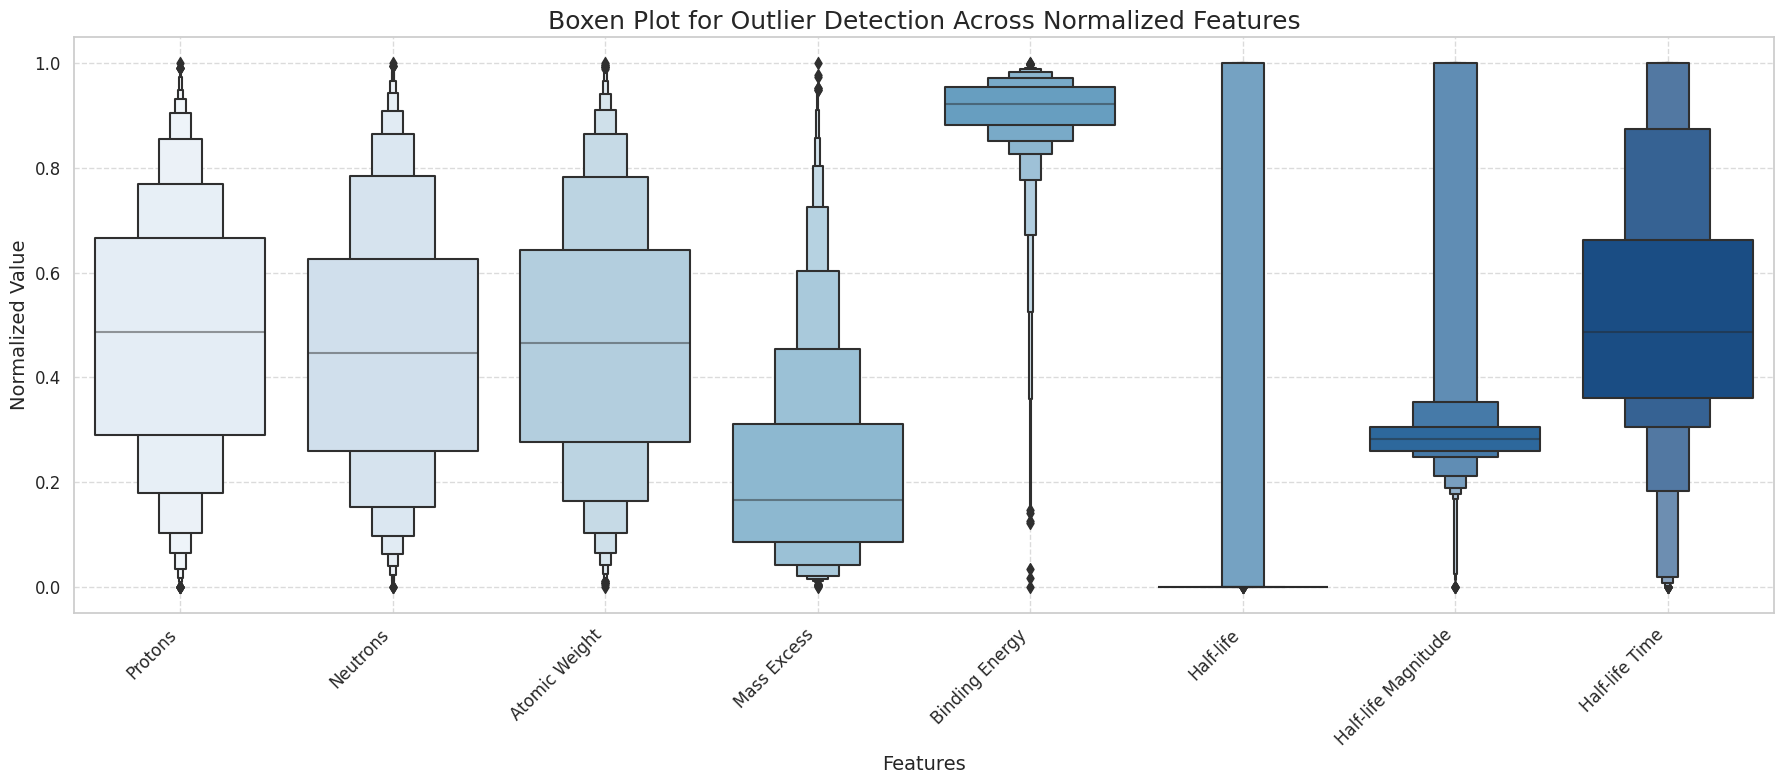

In [143]:
# Normalize the numerical features in the DataFrame
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to normalize
numerical_features = ['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy', 'Half-life', 'Half-life Magnitude', 'Half-life Time']
df_normalized = df[numerical_features]

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_normalized)

# Create a DataFrame from the normalized array
df_normalized = pd.DataFrame(df_normalized, columns=numerical_features)

# Create the Boxen Plot
plt.figure(figsize=(18, 8))
plt.title('Boxen Plot for Outlier Detection Across Normalized Features', fontsize=18)
sns.boxenplot(data=df_normalized, palette="Blues")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Normalized Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


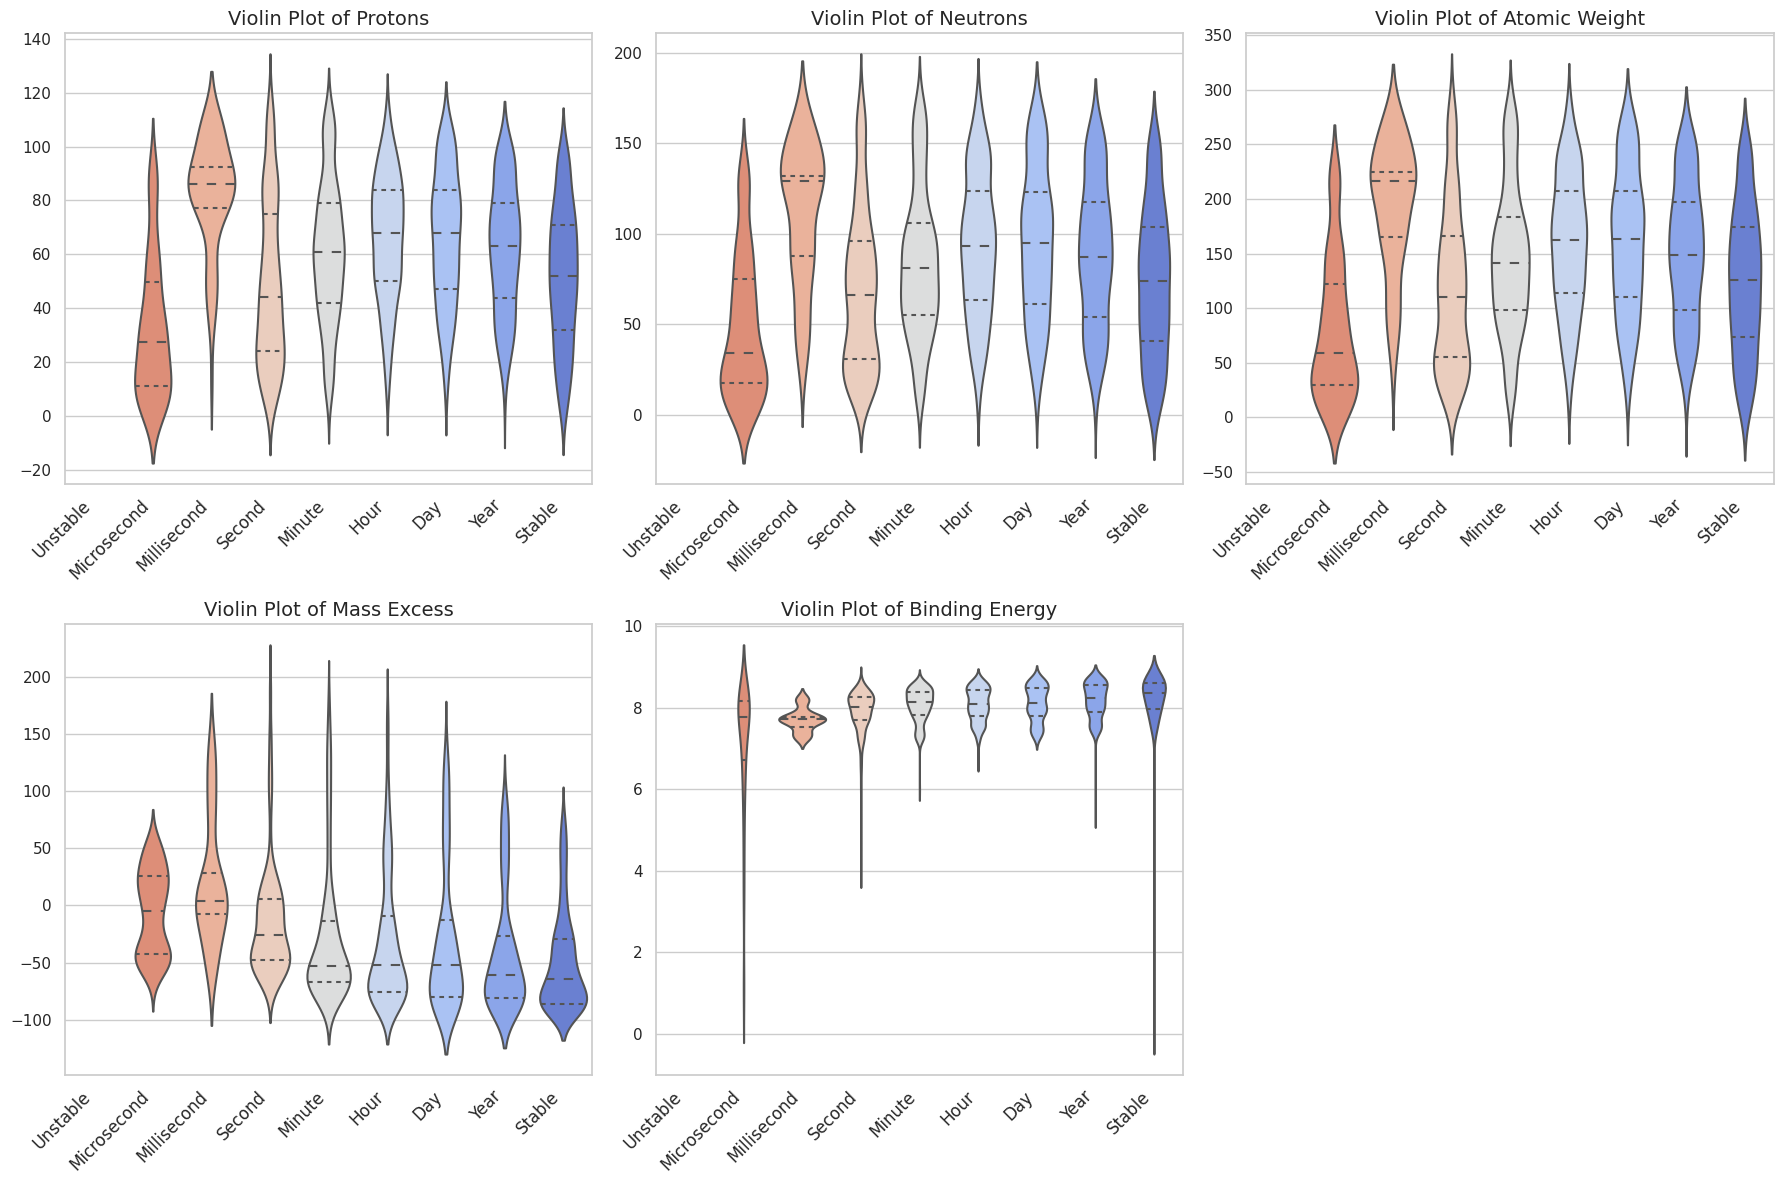

In [295]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a new column with rounded Half-life Time and descriptive labels
df['Rounded Half-life Time'] = pd.cut(df['Half-life Time'], bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                     labels=['Unstable', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Year', 'Stable'])

# Remove 'Unstable' category
df_filtered = df[df['Rounded Half-life Time'] != 'Unstable']

# Initialize the figure with a larger size
plt.figure(figsize=(18, 12))

# List of features to plot
features_to_plot = ['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy']

# Create subplots for each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)

    # Create a violin plot
    sns.violinplot(x='Rounded Half-life Time', y=feature, data=df_filtered, palette="coolwarm_r", inner='quartile')

    # Add labels and title
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('')
    plt.title(f'Violin Plot of {feature}', fontsize=14)

# Enhance the layout
plt.tight_layout()
plt.show()


<ipython-input-275-ed6dabdd3384>:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in ax.legend_.legendHandles:


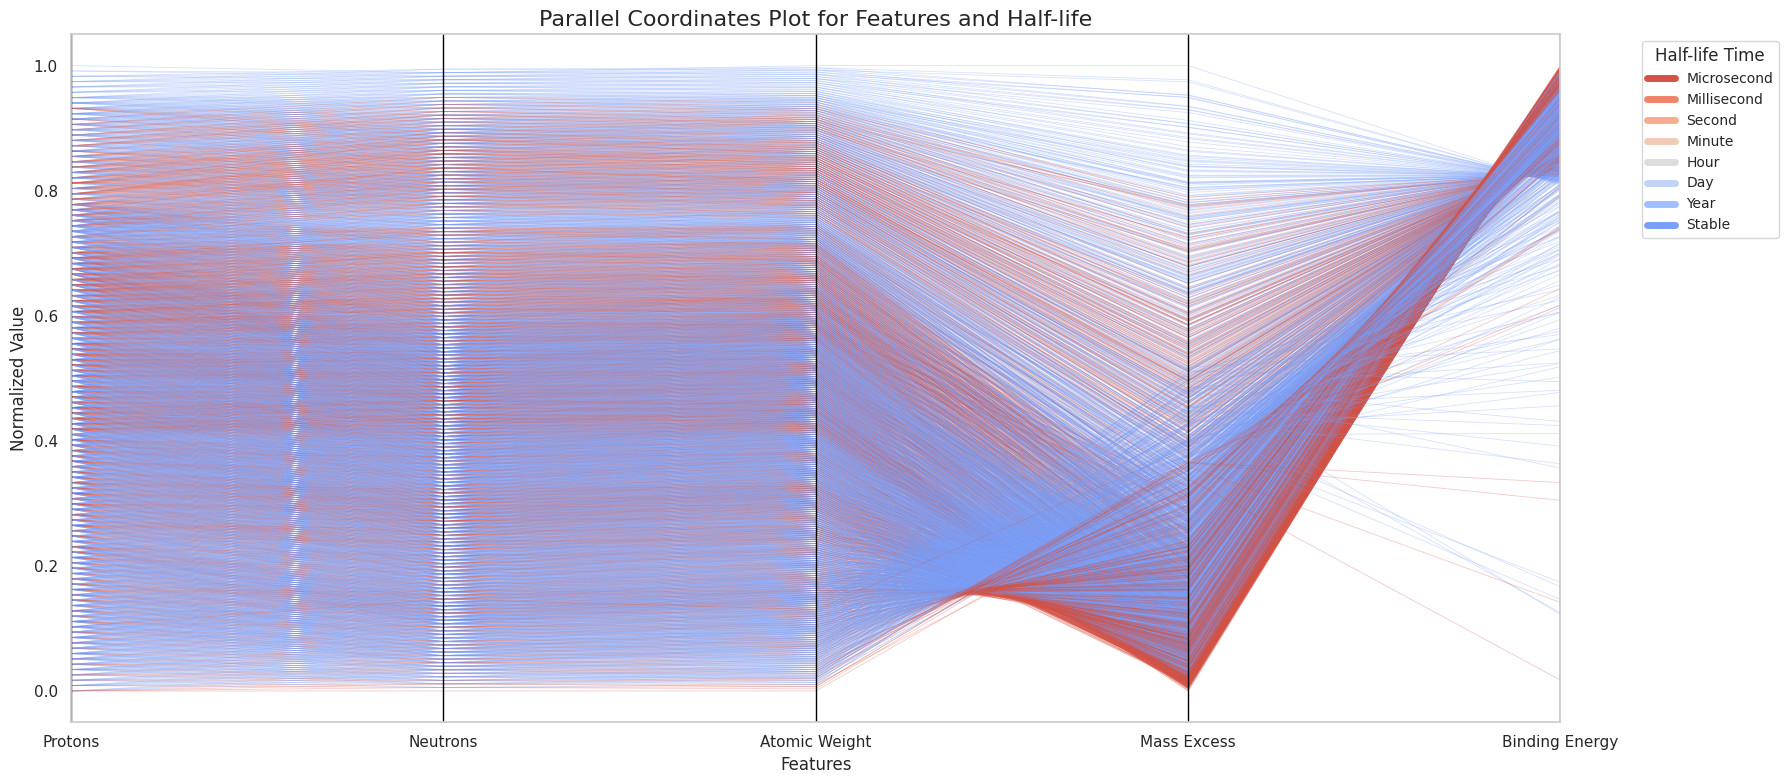

In [275]:
# Importing the required libraries
from pandas.plotting import parallel_coordinates
import matplotlib.lines as mlines

df['Rounded Half-life Time'] = pd.cut(df['Half-life Time'], bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                     labels=['Unstable', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Year', 'Stable'])

# Normalizing the data
df_normalized = (df[['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy']] - df[['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy']].min()) / (df[['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy']].max() - df[['Protons', 'Neutrons', 'Atomic Weight', 'Mass Excess', 'Binding Energy']].min())

# Adding the 'Rounded Half-life Time' to the normalized DataFrame
df_normalized['Rounded Half-life Time'] = df['Rounded Half-life Time']

# Drop rows where 'Rounded Half-life Time' is NaN
df_normalized = df_normalized.dropna(subset=['Rounded Half-life Time'])

# Define the order and colors for the categories
order = ['Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Year', 'Stable']
colors = sns.color_palette("coolwarm_r", 9)

# Create the parallel coordinates plot
plt.figure(figsize=(18, 8))
plt.title('Parallel Coordinates Plot for Features and Half-life', fontsize=16)

# Create the plot with ordered color mapping
ax = parallel_coordinates(df_normalized[::-1], 'Rounded Half-life Time', color=[colors[order.index(label)] for label in df_normalized['Rounded Half-life Time']], alpha=0.3, linewidth=0.6)

# Create legend handles
legend_handles = [mlines.Line2D([], [], color=colors[i], label=order[i]) for i in range(len(order))]

# Add the legend
plt.legend(handles=legend_handles, title='Half-life Time', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')

# Update line widths in the legend
for legobj in ax.legend_.legendHandles:
    legobj.set_linewidth(5.0)
    legobj.set_alpha(1)

plt.ylabel('Normalized Value')
plt.xlabel('Features')

plt.tight_layout()
plt.show()



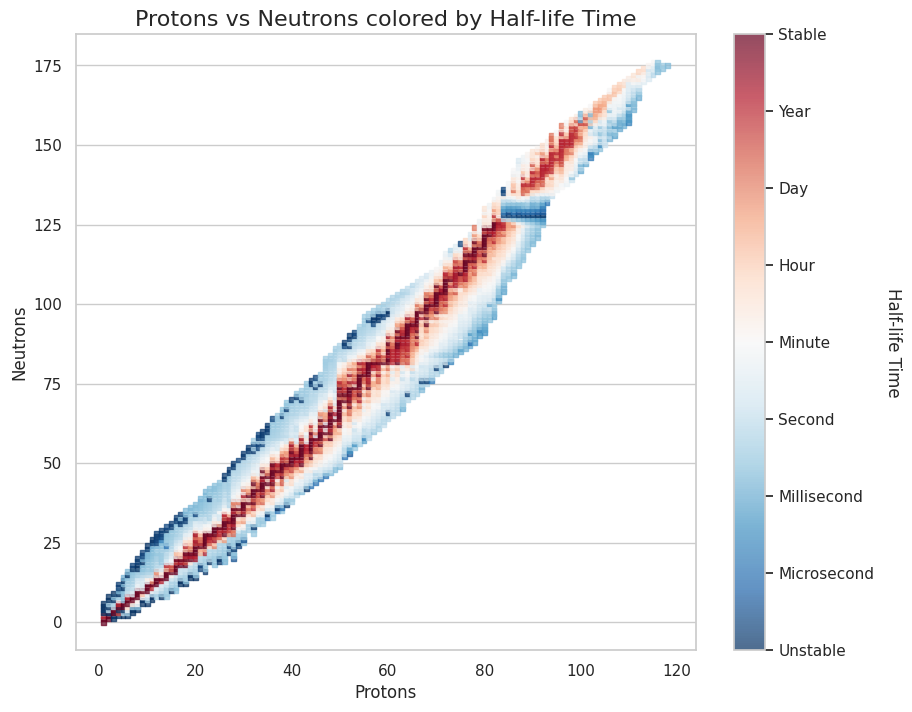

In [292]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating a 2D plot for Protons vs Neutrons with color representing Half-life Time
plt.figure(figsize=(10, 8))
plt.title('Protons vs Neutrons colored by Half-life Time', fontsize=16)

# Creating a scatter plot
sc = plt.scatter(df['Protons'], df['Neutrons'], c=df['Half-life Time'], cmap='RdBu_r', alpha=0.7, s=12, marker='s')

# Adding colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Half-life Time', rotation=270, labelpad=20)

# Set colorbar ticks to categorical labels
cbar.set_ticks(range(0, 9))
cbar.set_ticklabels(['Unstable', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Year', 'Stable'])

# Adding labels and title
plt.xlabel('Protons')
plt.ylabel('Neutrons')

# Removing vertical grid lines
plt.grid(axis='x')

plt.show()

